<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2025/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nibabel

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import scipy.signal as signal


## Load Nifti file

In [ ]:
h = nib.load('s02.nii.gz')

In [ ]:
print(h)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 32)
affine:
[[-9.96521771e-01  1.46108055e-02  1.64083198e-01  1.21900002e+02]
 [-7.60307815e-03  9.64462340e-01 -5.28219402e-01 -1.36844879e+02]
 [ 8.29852745e-02  2.63816088e-01  1.92198420e+00 -9.45585098e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  32   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.         1.         1.         1.9999906  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
ca

In [ ]:
mri = h.get_fdata()
print(mri.shape)

(256, 256, 32)


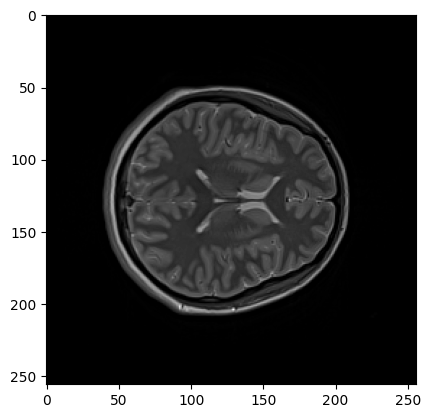

In [ ]:
plt.imshow(mri[:,:,20],cmap='gray')
plt.show()

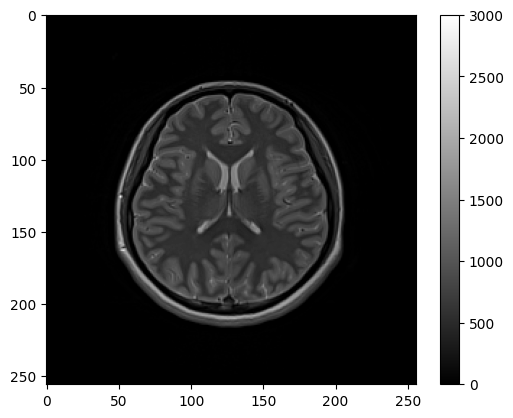

In [ ]:
img = mri[::-1,::-1,20].transpose((1,0))
plt.imshow(img,cmap='gray')
plt.colorbar()
plt.show()

## Edge detection - Kirsch Compass Kernels

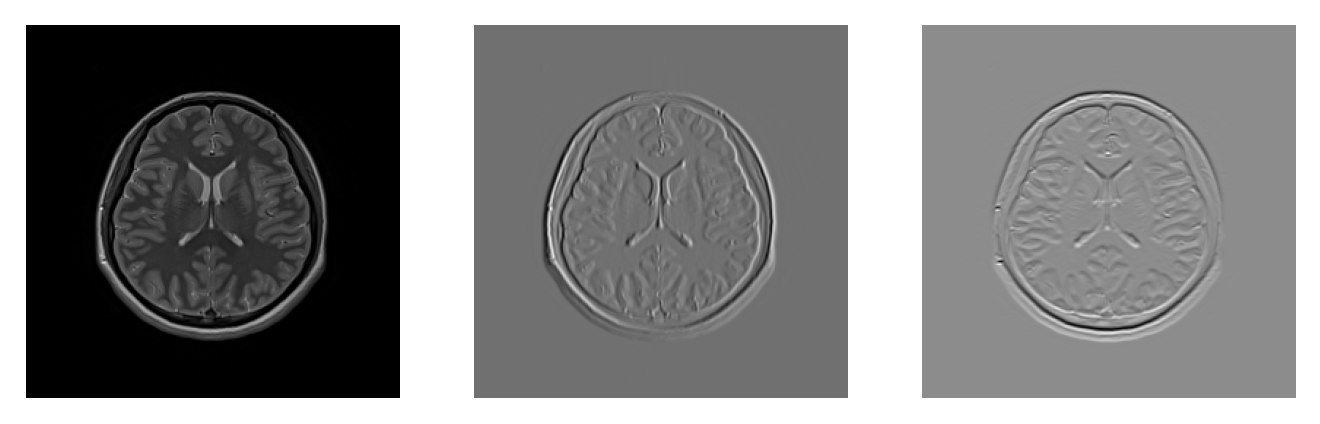

In [ ]:
n = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
nw = np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
w = np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
sw = np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
s = np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
se = np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
e = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
ne = np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])

plt.figure(dpi=256)
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(132)
g = signal.convolve2d(img,n,mode='same')
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.subplot(133)
g = signal.convolve2d(img,e,mode='same')
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

## Thresholding

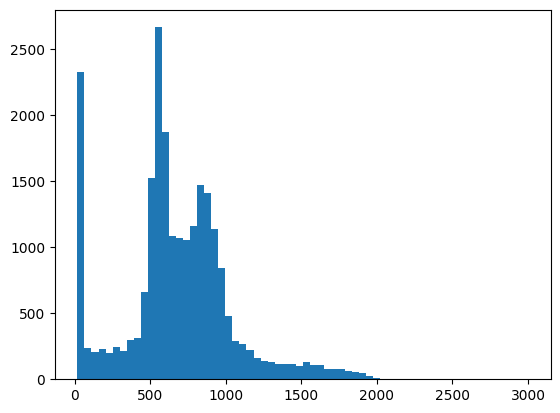

In [ ]:
th = 16
plt.hist(img[img>th].ravel(),64)
plt.show()

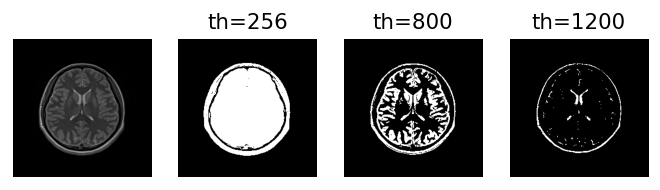

In [ ]:
th_vals = [256,800,1200]
plt.figure(dpi=128)
plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
for n in range(3):
  plt.subplot(1,4,n+2)
  bmsk = img>th_vals[n]
  plt.imshow(bmsk,cmap='gray')
  plt.axis('off')
  plt.title(f'th={th_vals[n]}')
plt.show()

## Noisy image

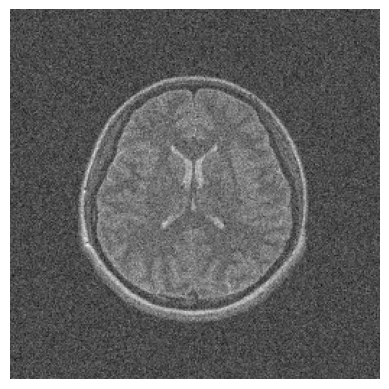

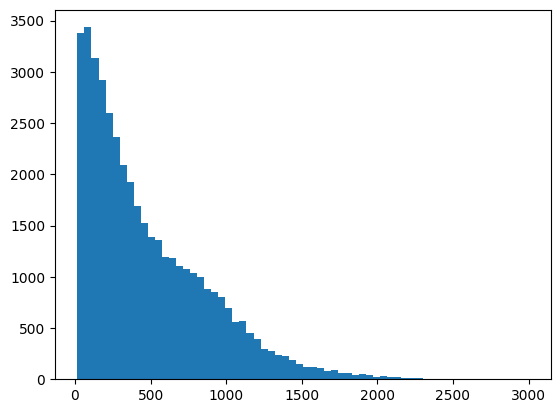

In [ ]:
img_n = img + 256*np.random.randn(img.shape[0],img.shape[1])
th = 16

plt.imshow(img_n,cmap='gray')
plt.axis('off')
plt.show()

plt.hist(img_n[img_n>th].ravel(),64)
plt.show()


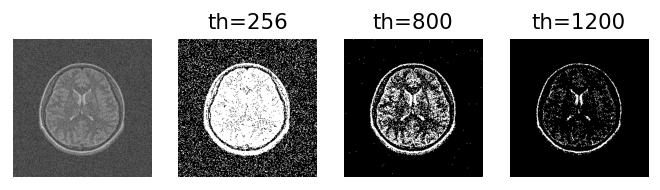

In [ ]:
th_vals = [256,800,1200]
plt.figure(dpi=128)
plt.subplot(1,4,1)
plt.imshow(img_n,cmap='gray')
plt.axis('off')
for n in range(3):
  plt.subplot(1,4,n+2)
  bmsk = img_n>th_vals[n]
  plt.imshow(bmsk,cmap='gray')
  plt.axis('off')
  plt.title(f'th={th_vals[n]}')
plt.show()

## Exercise 1: Kirsch Compass Kernels
- 눈이 보이는 슬라이스를 찾아 8개의 Kirsch Compass Kernel을 적용한 결과를 각각 display해보자.

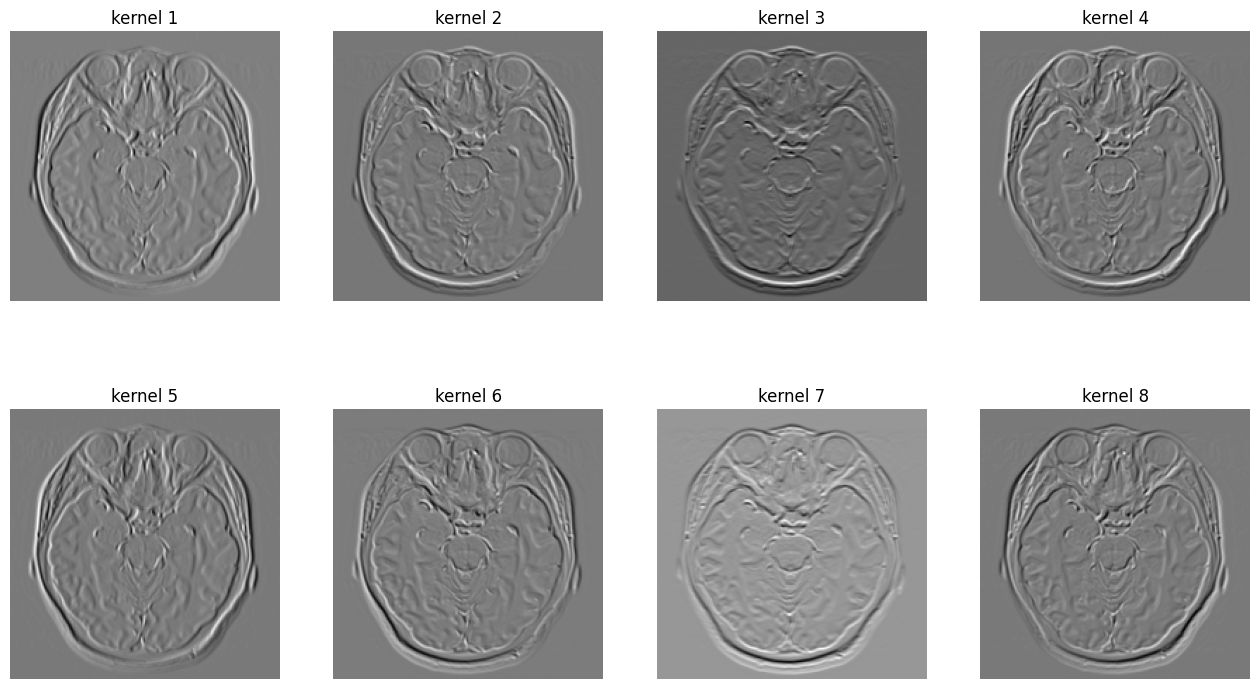

In [ ]:
ks = np.zeros((8,3,3))
ks[0] = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
#...

img = mri[::-1,::-1,30].transpose((1,0))

plt.figure(figsize=(16,9))
for n in np.arange(8):
  plt.subplot(2,4,n+1)
  # ...

## Exercise 2: Automatic Basic Global Thresholding
- 강의노트의 내용을 기반으로 하여 자동으로 global thresholding을 수행하는 영상처리코드를 작성해보자.

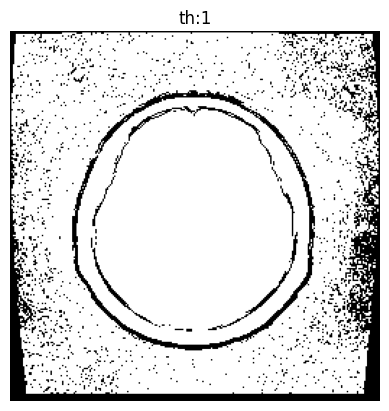

In [ ]:
T_init = 1
T = []
T.append(T_init)
dT = 1000
esp = 5

## write down your algorithm
#while dT>esp:


##

bmsk = img>T[-1]
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.show()